## 주제분석 1주차 클린업 패키지: module 이용

### 이름: 김준서
### 팀명: 데이터마이닝팀
### 날짜: 2022-10-27
##### **git hub: https://github.com/JunseoKim0103/PSAT_Package_python.git

## Chapter 1: 개발 환경 준비(Anaconda, PyCharm, Jupyter Notebook))
<ol>
    <li> 아나콘다는 설치가 되어 있어서 Week1이라는 가상환경을 먼저 생성하였다. <br />
        -> code: conda create -n Week1 python=3.8
    <li> 가상환경을 활성화하였다. <br />
        -> code: activate Week1
    <li> txt 파일을 읽어서 패키지를 다운받을 수 있는 코드를 작성하였다. <br />
        -> code: pip install -r 디렉토리 주소\requirements.txt
    <li> Pycharm 을 따로 설치해서 아니콘다 Week1 가상환경을 이용해서 프로젝트를 생성하였다.
    <li> anaconda prompt 에서 명령어를 통해서 jupyter notebook을 설치하였다.<br />
        -> code: pip install jupyter
     <li> 가상환경을 사용하기 위해서 kernel을 연결해주었다. <br />
         -> code: python -m ipykernel install --user --name week1 --display-name "week1"
    <li> 간단하게 jupyter notebook 명령어를 입력하면, 우리가 평소에 사용하던 jupyter notebook을 사용할 수 있다. <br /> -> code: jupyter notebook
<ol/>



## Chapter 2: 데이터 전처리 및 시각화
#### 문제1. 주어진 concrete_data.csv 데이터셋을 불러오고, 비어있는 행이 있는지 확인해 주세요.


In [1]:
import pandas as pd
DF = pd.read_csv("./concrete_data.csv") ## 데이터 프레임 불러오기
DF.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,192.0,0.0,978.4,825.5,360,44.30


In [2]:
## 비어있는 행이 존재하는지 확인
print(DF.empty) ## 존재하지 않는다.

False


#### 문제2. 주어진 데이터셋을 train 데이터셋과 test 데이터셋으로 분리하고, 각각의 크기를 출력해 주세요.  
(HINT) test 데이터셋의 비율을 0.2로 설정하고, random state를 설정해 주세요.


In [3]:
## 시드 고정

import random ## 시드값을 가져오기 위해서 사용하는 패키지
import numpy as np
class config:
    seed = 1398
    
def seed_global(seed: int = 1398):
    random.seed(seed)
    np.random.seed(seed)

In [4]:
## 데이터를 Train set과 valid set으로 구분 (seed : 2930, 7:3 비율)

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(DF,test_size=0.3,shuffle=True,random_state= 1398) ## 순차적 추출일 경우에는 shuffle을 false로 둔다.
## shape으로 train test 길이 크기 확인한다.
print("xtrain shape: {} 이고, xtest shape: {} 입니다.".format(X_train.shape, X_test.shape))

xtrain shape: (721, 8) 이고, xtest shape: (309, 8) 입니다.


#### 문제3. 학습 데이터(train)의 기술통계량과 변수별 분포와 관계를 확인하세요.
(HINT) seaborn 라이브러리를 활용하면 편합니다.


In [5]:
### 기술 통계량 확인 -> pandas의 describe 사용
DF_기술통계량 = X_train.describe()
DF_기술통계량.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,283.558114,75.382940,182.272954,6.155340,968.382802,773.338835,45.940361,35.575756
std,105.442792,86.784785,21.634135,6.180999,77.309384,82.179981,66.309925,16.487956
min,102.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,3.320000
25%,194.700000,0.000000,165.600000,0.000000,932.000000,727.600000,7.000000,23.890000


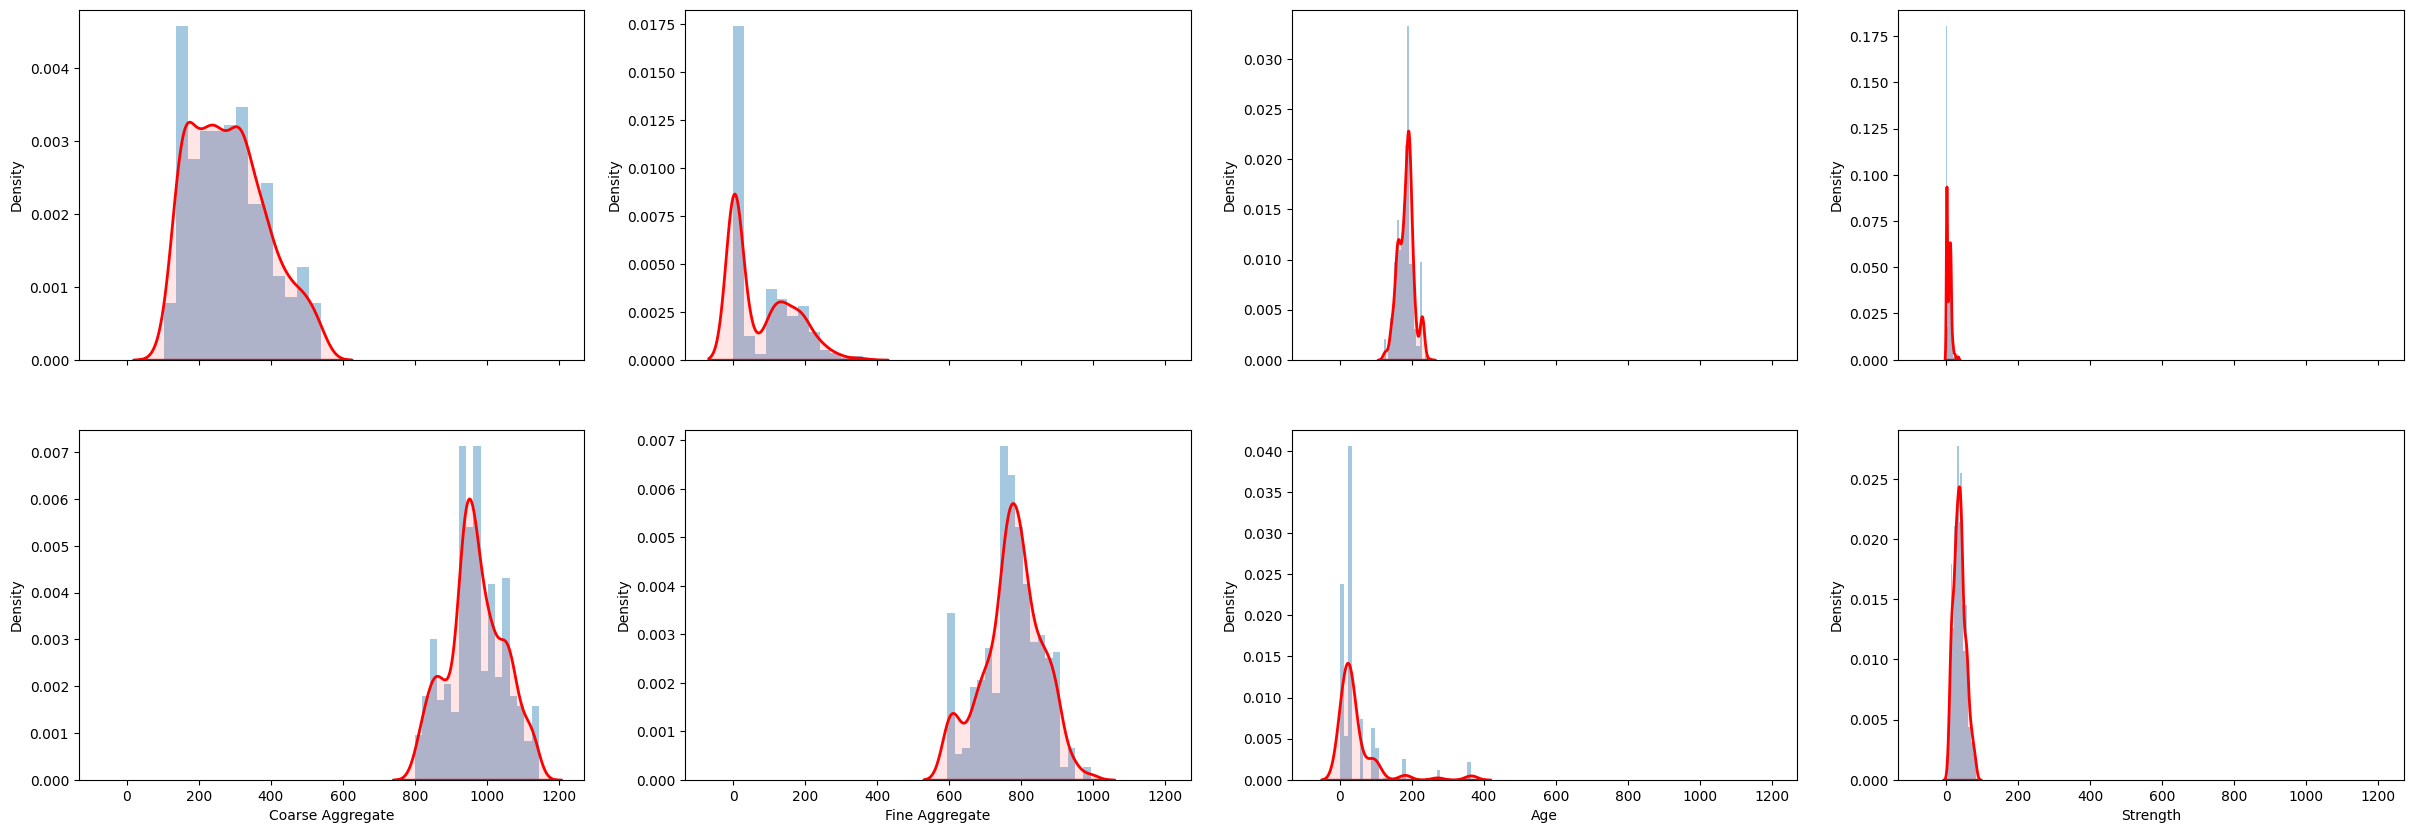

In [6]:
### 경고 메시지 제거
import warnings
warnings.filterwarnings(action='ignore')

### 변수별 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
list_name = list(X_train.columns)

f, axes = plt.subplots(2, 4, figsize = (30,10),sharex = True) ## 2, 4 짜리 기본 그래프 틀을 제작하고. figure size는 잘 안보여서 30, 10으로 키웠다.
axes_r = 0 ## default row 값
axes_c = 0 ## default column 값
for col in list_name:
    if (axes_c > 3): ## 인덱스는 0부터 세므로, column이 3보다 커지면(4가 되면), 아래 줄로 내려가는 코드를 작성
        axes_c = 0 ## column 이 3보다 커지므로, 아래 줄로 내려가 첫번째 컬럼으로 가야함
        axes_r = axes_r + 1 ## row가 1번째 로우가 아닌 다음 row로 변경됨
    sns.distplot(a = X_train[col], kde  = True, ax = axes[axes_r, axes_c], kde_kws = {"color": "red", "alpha": 0.1, "linewidth": 2, "shade": True}) ## 색상, 투명도, 라인 굵기, 도형 채우기
    axes_c = axes_c + 1 ## 다음 column 줄에 그린다.

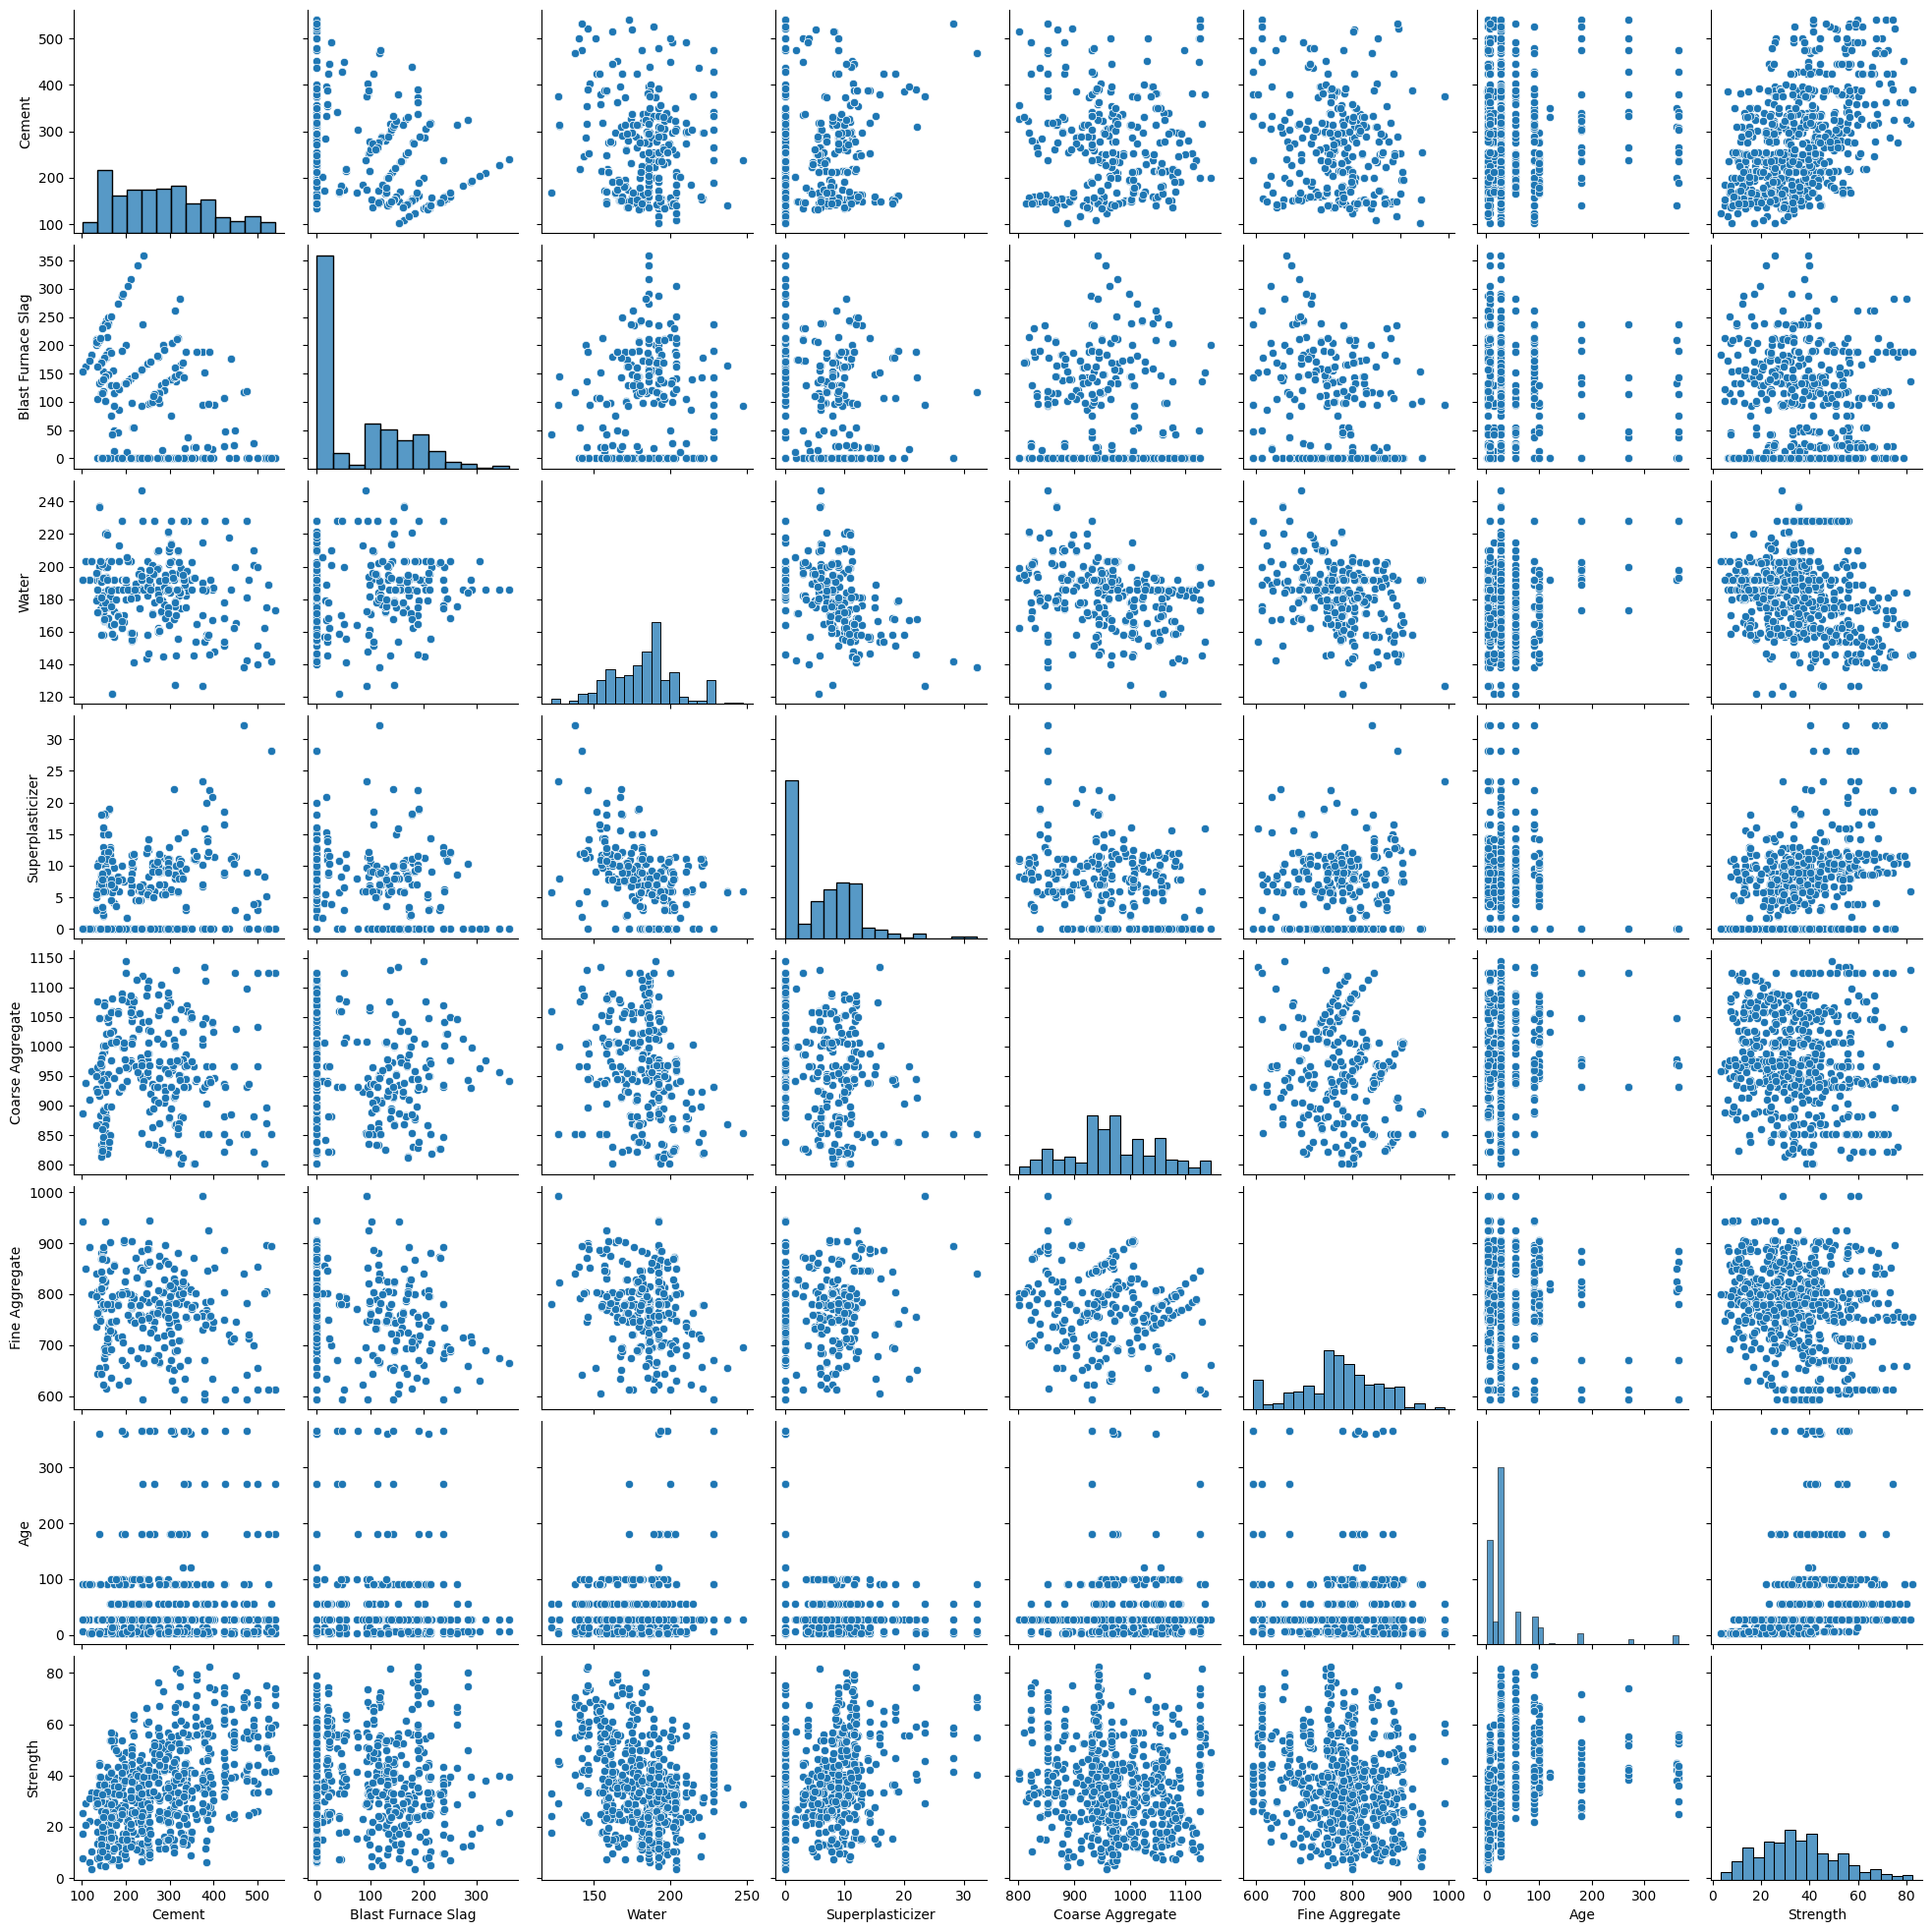

In [7]:
### 관계 그래프 그리기
sns.pairplot(data = X_train) ## 간단히 pairplot을 통해서 관계 그래프를 표현할 수 있다.

#### 문제4. 변수들 간의 상관계수 행렬을 확인하고, 이를 히트맵으로 시각화 하세요.
(HINT) seaborn 라이브러리를 활용하면 편합니다.


<AxesSubplot: >

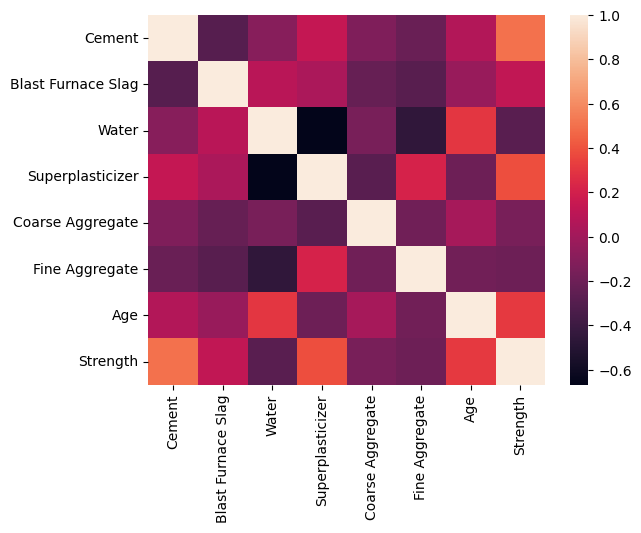

In [8]:
### correlation 구하기
corr_feature = X_train.corr()
### 히트 맵으로 표현 -> seaborn에 존재하는 heatmap을 통해서 표현한다.
sns.heatmap(corr_feature)

#### 문제5. VIF(Variance Inflation Factors)가 무엇인지 간략히 설명한 후, VIF를 확인하여 제거해야 할 변수가 있다면 제거해 주세요.
(HINT) statsmodels 라이브러리를 사용하면 편합니다.


##### VIF: 분산팽창 인수란?
<div style = "margin-top: 20px">
    <ol>
        <li> 회귀 분석시 예측 변수들(Xs) 간의 다중공선성(multicollinearity)을 파악해야 한다.
        <li>다중공선성이란 예측 변수들 간의 상관성이 높은지를 파악하는 것이며, 이 값을 VIF로 파악하게 된다.
        <li>VIF는 예측변수들이 상관성이 있을 때 추정 회계 계수의 산포 크기를 측정하는 것이며, 산포가 커질수록 회귀 모형은 신뢰할 수 없게 된다. 
        <li>VIF 값이 1 근방에 있으면 다중공선성이 없어 모형을 신뢰할 수 있으며 만약 VIF 값이 10 이상이 되면 매우 높은 다중공선성이 있기 때문에 변수 선택을 신중히 고려해야 한다.
   </ol>
<div/>  

<div style = "margin-top: 20px">
    <h5>수식으로 표현하면 다음과 같다.<h5/>
<div/>    
        
<div>      
$$ VIF = \frac{1}{(1-R^2(x_1))} $$
<div/> 
 

In [9]:
### train 데이터의 x 값, y 값 분류 -> y 값이 다중공선성에 미치는 영향 때문에

X_train_x = X_train.drop("Strength", axis = 1)
X_train_y = X_train["Strength"]

In [10]:
### 분산팽창인수 적용
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(data):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])] ## VIF 변수를 반복문을 통해서 계산한다.
    vif["features"] = data.columns ## feature로 이루어진 열을 만들어준다.
    vif = vif.sort_values("VIF Factor").reset_index(drop = True) ## sort 한다.
    return vif

vif = VIF(X_train_x)
vif


,VIF Factor,features
0,1.642188,Age
1,2.113764,Blast Furnace Slag
2,3.113781,Superplasticizer
3,9.172801,Cement
4,66.396255,Fine Aggregate
5,69.356159,Water
6,80.792521,Coarse Aggregate


In [11]:
list_VIF_remove = list()
for i in range(len(vif["VIF Factor"])):
    if (vif["VIF Factor"][i] >= 10):
        list_VIF_remove.append(vif["features"][i])
        
print("제거해야 하는 변수 리스트: {}".format(list_VIF_remove)) 

제거해야 하는 변수 리스트: ['Fine Aggregate', 'Water', 'Coarse Aggregate']


#####  변수 제거: 제거하는 변수 리스트에서 	Water, Coarse Aggreagate을 제외하고는 변수에서 제거한다. 
큰 변수들 간 다중공선성이 존재하는 것이기 때문에, 큰 것부터 제거해나가도록 한다. 필자는 제일 큰 Water와 Coarse Aggregate를 먼저 제거해본 이후에, 다시 한 번 VIF 지수를 사용해보도록 하겠다.

In [12]:
list_not_multicollinearity = list(set(X_train_x.columns) - set(list_VIF_remove))
print("다중공선성에 어긋나지 않는 변수 리스트: {}".format(list_not_multicollinearity))

### Fine Aggregate 추가
list_not_multicollinearity = list_not_multicollinearity + ["Fine Aggregate"]
print("Fine Aggregate 추가된 다중공선성에 어긋나지 않는 변수 리스트: {}".format(list_not_multicollinearity))

다중공선성에 어긋나지 않는 변수 리스트: ['Age', 'Superplasticizer', 'Blast Furnace Slag', 'Cement']
Fine Aggregate 추가된 다중공선성에 어긋나지 않는 변수 리스트: ['Age', 'Superplasticizer', 'Blast Furnace Slag', 'Cement', 'Fine Aggregate']


In [13]:
list_not_multicollinearity
X_train_new = X_train[list_not_multicollinearity]
X_train_new.head()

,Age,Superplasticizer,Blast Furnace Slag,Cement,Fine Aggregate
35,270,0.0,237.5,237.5,594.0
423,14,4.1,13.6,172.4,856.4
404,28,10.4,180.0,275.0,765.0
255,14,8.7,0.0,212.5,903.6
98,7,8.9,118.8,475.0,781.5


In [14]:
## 다시 한번 분산팽창 인수를 확인한다.
VIF(X_train_new)

,VIF Factor,features
0,1.534830,Age
1,1.705177,Blast Furnace Slag
2,2.209641,Superplasticizer
3,7.323383,Cement
4,8.877609,Fine Aggregate


##### VIF 변수 제거 결과 해석
결과를 보면, VIF Factor가 모두 10보다 작음을 확인할 수 있다. 두개의 변수를 제거하고 사용하도록 한다.

In [15]:
### 다시 y 변수를 추가해주도록 하겠다.
list_new_train = list_not_multicollinearity + ["Strength"]
X_train_new = X_train[list_new_train]
X_train_new.head()

,Age,Superplasticizer,Blast Furnace Slag,Cement,Fine Aggregate,Strength
35,270,0.0,237.5,237.5,594.0,38.41
423,14,4.1,13.6,172.4,856.4,29.75
404,28,10.4,180.0,275.0,765.0,76.24
255,14,8.7,0.0,212.5,903.6,26.31
98,7,8.9,118.8,475.0,781.5,55.60


#### 문제6. 변수별로 이상치가 있는지 파악하기 위해 Boxplot을 아래와 같이 시각화 하세요.
그래프의 크기는 (20, 15)로 지정


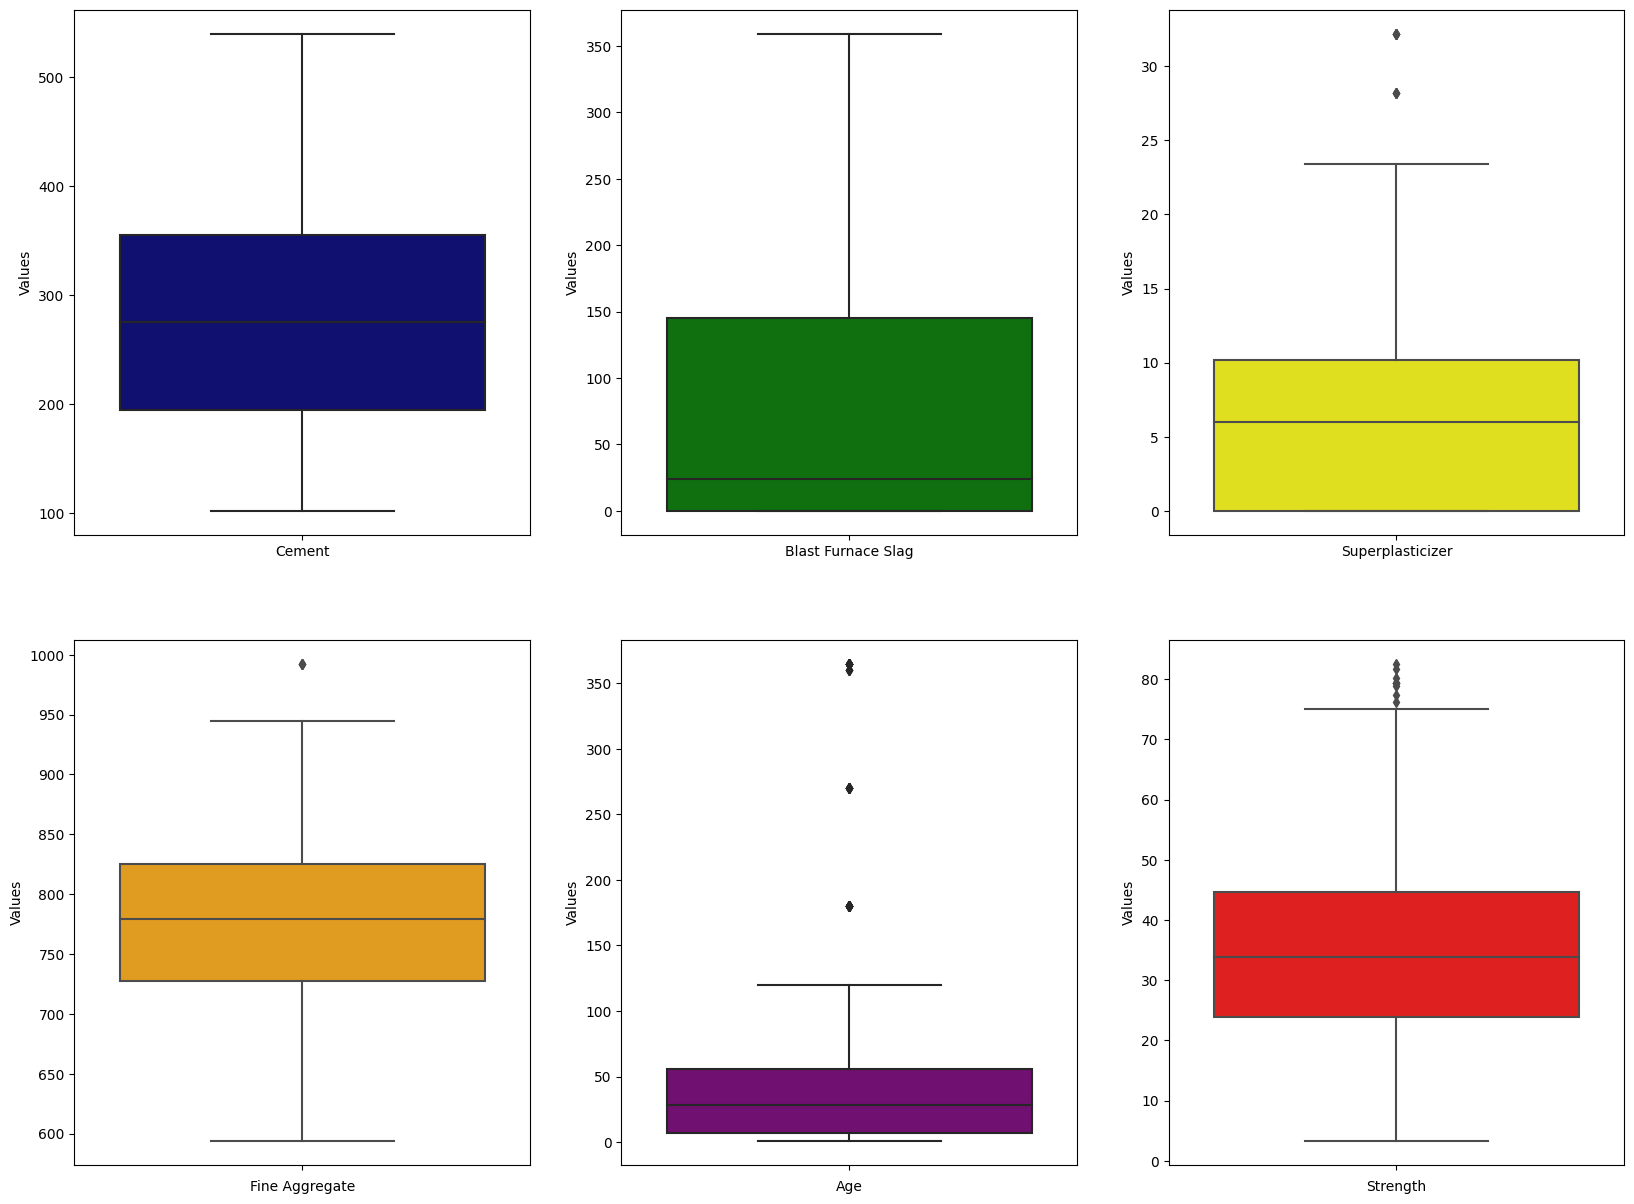

In [16]:
f, axes = plt.subplots(2, 3, figsize = (20,15),sharex = True) ## 2, 4 짜리 기본 그래프 틀을 제작하고. figure size는 잘 안보여서 30, 10으로 키웠다.
axes_r = 0 ## default row 값
axes_c = 0 ## default column 값
list_name = ["Cement", "Blast Furnace Slag", "Superplasticizer", "Fine Aggregate","Age","Strength"] ## 열 이름 리스트 제작
list_color = ["navy", "green", "yellow", "orange", "purple", "red"] ## 색상 리스트를 직접 제작
for length in range(len(list_name)):
    if (axes_c > 2): ## 인덱스는 0부터 세므로, column이 2보다 커지면(3가 되면), 아래 줄로 내려가는 코드를 작성
        axes_c = 0 ## column 이 2보다 커지므로, 아래 줄로 내려가 첫번째 컬럼으로 가야함
        axes_r = axes_r + 1 ## row가 1번째 로우가 아닌 다음 row로 변경됨
    ax = sns.boxplot(y= X_train_new[list_name[length]].values,ax = axes[axes_r, axes_c], color=list_color[length]) ## y값 지정, figure 위치 지정, 색상 지정
    ## set으로 지정할 요소 dictionary 제작 -> ylabel, xlabel 넣을 때 사용 -> title도 가능
    props = {
        'ylabel': 'Values', 
        'xlabel': list_name[length] 
    } 
    ax.set(**props) ## 그래프에 요소들을 적용시켜준다.
    """
    ** 표시의 의미는??? 
    keyword argument로 kwargs라고 부른다.
    **kwargs 는 (key = value) 형태로 함수를 호출할 수 있다.
    즉, 그대로 딕셔너리 형태로 {key: value} 이런 식으로 함수 내부로 전달할 수 있다.
    """
    axes_c = axes_c + 1 ## 다음 column 줄에 그린다.

#### 문제7. 주어진 outlier.py를 설명에 따라 완성하고, del_outlier 함수를 활용하여 이상치를 제거해 주세요.
outlier.py를 제작하고 import 해서 불러오도록 하자!!


In [17]:
### 같은 경로에 있으므로 그냥 사용하면 될듯??
## 아니면 sys로 설정
from outlier import del_outlier

In [18]:
## X 변수만 존재하는 data 변수와, y 변수만 존재하는 y 변수를 생성
data = X_train_new.drop("Strength", axis = 1)
y = pd.DataFrame(X_train_new["Strength"], columns = ["Strength"])

### 함수 돌리기
DF_x , DF_y = del_outlier(data, y)

## 결과 확인
print(DF_x.head())
print(DF_y.head())

## shape 확인
print("x 변수 shape: ", DF_x.shape)
print("y 변수 shape: ", DF_y.shape)

### train_x_y다시 담아두기
train_x = DF_x
train_y_origin = DF_y

      Age  Superplasticizer  Blast Furnace Slag  Cement  Fine Aggregate
423    14               4.1                13.6   172.4           856.4
255    14               8.7                 0.0   212.5           903.6
98      7               8.9               118.8   475.0           781.5
114     7              11.6               189.0   362.6           755.8
1015   28               8.5               148.6   322.5           709.5
      Strength
423      29.75
255      26.31
98       55.60
114      22.90
1015     52.43
x 변수 shape:  (663, 5)
y 변수 shape:  (663, 1)


#### 문제8. 주어진 transform.py를 설명에 따라 완성하고, Scaling 클래스를 활용하여 train 데이터셋과 test 데이터셋 모두에 대해 minmax scaling을 진행해 주세요.
<ol>
    <li>Minmax Scaling 된 학습 데이터의 기술통계량을 확인하여 scaling이 잘 되었는지 확인하세요<br />  
        : min이 0으로 Max 가 1로 동일한 것을 보니, scaling이 잘 진행이 되었음을 확인할 수 있었습니다. 
    <li>Minmax Scaling 된 학습 데이터의 VIF를 확인하고, 어떻게 달라졌는지 설명해 주세요<br />
        : VIF가 이전에 비해서 감소한 모습을 볼 수 있습니다. minmax scaling을 통해서 분산 정도가 변화한 것 같습니다.
<ol/>


In [19]:
from transform import Scaling

In [20]:
## 먼저 train x 변수를 투입해서 새로운 class를 선언한다.
scaling = Scaling(DF_x)

## 이제 scaling class 내 minmax_scaling를 통해서 결과를 출력해보자 -> test 값 하나를 변수로 가진다.
### test 데이터에는 이상치 처리를 진행하지 않는다 -> test 끼리는 이상치일 수 있으나, 실제 train에서는 아닐 수 있다.
test_X = X_test[list_not_multicollinearity]
test_Y = pd.DataFrame(X_test["Strength"], columns = ["Strength"])

minmax_train, minmax_test = scaling.minmax_scaling(test_X)

In [21]:
## minmax scaling with train

### 데이터 확인
minmax_train.head()

### 기술 통계량 확인
minmax_train.describe()

### VIF 확인
VIF(minmax_train)

,VIF Factor,features
0,1.424637,Blast Furnace Slag
1,1.675181,Age
2,2.265379,Superplasticizer
3,2.546267,Cement
4,3.068238,Fine Aggregate


In [22]:
## minmax scaling with test

### 데이터 확인
minmax_test.head()

### 기술 통계량 확인
minmax_test.describe()

### VIF 확인
VIF(minmax_test)

,VIF Factor,features
0,1.449690,Blast Furnace Slag
1,1.640447,Age
2,2.588361,Superplasticizer
3,2.660789,Cement
4,3.473058,Fine Aggregate


## Chapter 3: 모델링 – Normal Equation
#### 문제1. 주어진 model.py를 완성하세요.
#### 문제2. 주어진 matrix.py를 완성하세요
#### 문제3. 완성된 matrix.py를 import한 후, Chapter 2에서 만든 최종 데이터셋을 활용하여 LSE 클래스의 객체를 생성해 주세요.



In [23]:
### 위에서 사용한 minmax_train,  y값 가져오기
### data1 -> x 값들을 입력으로 받는다.
### data2 -> y 값들을 입력으로 받는다.
### test_original -> test의 y 값을 담는다.

data1 = minmax_train.copy() ## train x copy
data2 = DF_y.copy() ## train y copy
test_original = test_Y.copy() ## test_y

In [24]:
from matrix import LSE
LSE_train = LSE(data1,  data2)

#### 문제4. Model 클래스 내에 정의된 describe() 함수의 Exception이 정상적으로 출력되는지 확인해 주세요.
(HINT) describe() 함수의 인자로 ‘X’, ‘y’가 아닌 string을 아무거나 넣으면 됩니다.

In [25]:
LSE_train.describe("X")
LSE_train.describe("y")
# LSE_train.describe("PSAT")
# Exception: Not Defined

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 423 to 933
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 663 non-null    float64
 1   Superplasticizer    663 non-null    float64
 2   Blast Furnace Slag  663 non-null    float64
 3   Cement              663 non-null    float64
 4   Fine Aggregate      663 non-null    float64
dtypes: float64(5)
memory usage: 31.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 423 to 933
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Strength  663 non-null    float64
dtypes: float64(1)
memory usage: 10.4 KB


#### 문제5. LSE 클래스의 normal_eq() 함수를 사용하여 회귀모형을 적합하고, 학습 데이터에 대한 예측값과 실제값을 아래와 같이 비교해 주세요.


In [26]:
###  normal_eq() 함수의 return 값을 결과값으로 객체에 저장
theta, train_pred = LSE_train.normal_eq()

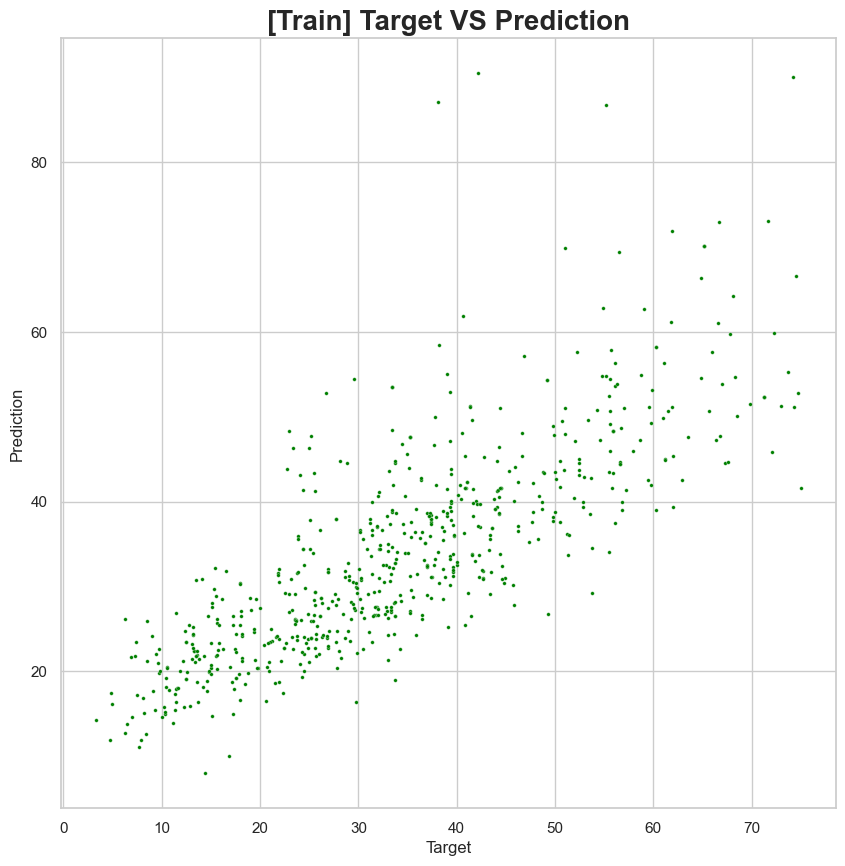

In [27]:
### 그래프 크기 지정
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
### x = target, y = prediction으로 scatter plot그리기
### y가 가지고 있는 데이터 프레임에 추가하기
DF_y_visual = DF_y.copy()
DF_y_visual["Prediction"] = train_pred
DF_y_visual.columns= ["Target", "Prediction"]
x_train_target= DF_y_visual["Target"] ## train 데이터의 실제 y 값
y_train_prediction= DF_y_visual["Prediction"] ## train_pred의 예측값
axes = sns.scatterplot(x=x_train_target,
                       color = "green", ## 점 색상
                       y=y_train_prediction,## 데이터 대입
                       s=7, ## 점 크기
                      )
axes.set_title("[Train] Target VS Prediction",fontsize=20,weight='bold')
plt.show()

                

In [28]:
### predict의 return 값을 객체에 저장
test_pred = LSE_train.predict(minmax_test)

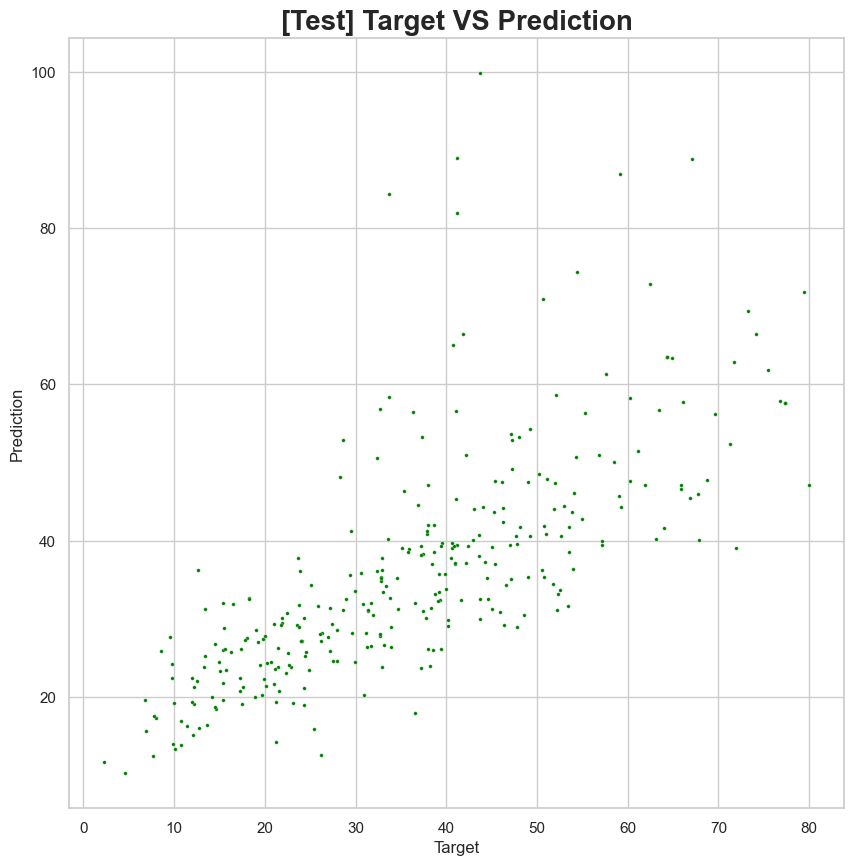

In [29]:
test_Y_re_test = test_Y
### 그래프 크기 지정
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
### x = target, y = prediction으로 scatter plot그리기
### y가 가지고 있는 데이터 프레임에 추가하기
Test_visual = test_Y.copy()
Test_visual["Prediction"] = test_pred
Test_visual.columns= ["Target", "Prediction"]
x= Test_visual["Target"] ## train 데이터의 실제 y 값
y= Test_visual["Prediction"] ## train_pred의 예측값
axes = sns.scatterplot(x=x,
                       color = "green", ## 점 색상
                       y=y,## 데이터 대입
                       s=7, ## 점 크기
                      )
axes.set_title("[Test] Target VS Prediction",fontsize=20,weight='bold')


plt.show()


<h2> Chapter 4: 모델링 – Gradient Descent

####  문제1. 경사하강법이란 무엇인지, 수식이 어떻게 되는지 설명해 주세요.



<div >
    <br/>
    <li> 경사 하강법이란: <br/>
        (傾斜下降法, Gradient descent)은 1차 근사값 발견용 최적화 알고리즘이다. 기본 개념은 함수의 기울기(경사)를 구하고 경사의 반대 방향으로 계속 이동시켜 극값에 이를 때까지 반복시키는 것이다.  
    <div style = "text-align: cented; margin-bottom : 10px">
    수식: 
    $$
    x_{i+1} = x_{i} - α\frac{df}{dx}(X_{i})
    $$
    <div/>
    <br/>
<div/>
    
        
#### 문제2. 주어진 gradient.py를 완성하세요.
#### 문제3. 완성된 gradient.py를 import한 후, Chapter 2에서 만든 최종 데이터셋을 활용하여 GradientDescent 클래스의 객체를 생성해 주세요.

In [30]:
#### gradient.py 임포트
from gradient import GradientDescent
### 객체 생성
data1 = minmax_train
data2 = train_y_origin

gradient_model = GradientDescent(data1, data2)

#### 문제4. 주어진 gradient.py를 완성하세요.

#### 문제5. GradientDescent 클래스의 compute_gradient() 함수를 사용하여 회귀모형을 적합하고, 학습 데이터에 대한 예측값과 실제 값을 Chapter 3의 문제 5, 6과 동일하게 시각화 해주세요.


In [31]:
import torch
## Adam이 성능이 좋았다.
theta_Adam, cost_hist_Adam, theta_hist_Adam, train_pred_Adam= gradient_model.compute_gradient(num_iter = 20000, lr = 0.02, optimizer = torch.optim.Adam)

Epoch    0/20000 time: 0.0019996166229248047 Cost: 1245.106205
Epoch  100/20000 time: 0.03899979591369629 Cost: 949.460969
Epoch  200/20000 time: 0.07599973678588867 Cost: 720.043984
Epoch  300/20000 time: 0.1119987964630127 Cost: 547.109405
Epoch  400/20000 time: 0.14699888229370117 Cost: 420.578201
Epoch  500/20000 time: 0.18399930000305176 Cost: 330.993012
Epoch  600/20000 time: 0.22099971771240234 Cost: 269.754000
Epoch  700/20000 time: 0.25699949264526367 Cost: 229.347803
Epoch  800/20000 time: 0.292999267578125 Cost: 203.520807
Epoch  900/20000 time: 0.3279993534088135 Cost: 187.353074
Epoch 1000/20000 time: 0.36099910736083984 Cost: 177.211102
Epoch 1100/20000 time: 0.3959991931915283 Cost: 170.589799
Epoch 1200/20000 time: 0.42999935150146484 Cost: 165.883857
Epoch 1300/20000 time: 0.4669992923736572 Cost: 162.140942
Epoch 1400/20000 time: 0.5039989948272705 Cost: 158.840314
Epoch 1500/20000 time: 0.540999174118042 Cost: 155.721804
Epoch 1600/20000 time: 0.5769996643066406 Cost

Epoch 14200/20000 time: 5.115000009536743 Cost: 90.790088
Epoch 14300/20000 time: 5.149998664855957 Cost: 90.790088
Epoch 14400/20000 time: 5.1839988231658936 Cost: 90.790088
Epoch 14500/20000 time: 5.219998359680176 Cost: 90.790088
Epoch 14600/20000 time: 5.255998611450195 Cost: 90.790088
Epoch 14700/20000 time: 5.291999101638794 Cost: 90.790088
Epoch 14800/20000 time: 5.327998638153076 Cost: 90.790088
Epoch 14900/20000 time: 5.3659987449646 Cost: 90.790088
Epoch 15000/20000 time: 5.402998447418213 Cost: 90.790088
Epoch 15100/20000 time: 5.440998792648315 Cost: 90.790088
Epoch 15200/20000 time: 5.474999666213989 Cost: 90.790088
Epoch 15300/20000 time: 5.508999586105347 Cost: 90.790088
Epoch 15400/20000 time: 5.54399847984314 Cost: 90.790088
Epoch 15500/20000 time: 5.579998970031738 Cost: 90.790088
Epoch 15600/20000 time: 5.6149983406066895 Cost: 90.790088
Epoch 15700/20000 time: 5.649998426437378 Cost: 90.790088
Epoch 15800/20000 time: 5.684998512268066 Cost: 90.790088
Epoch 15900/200

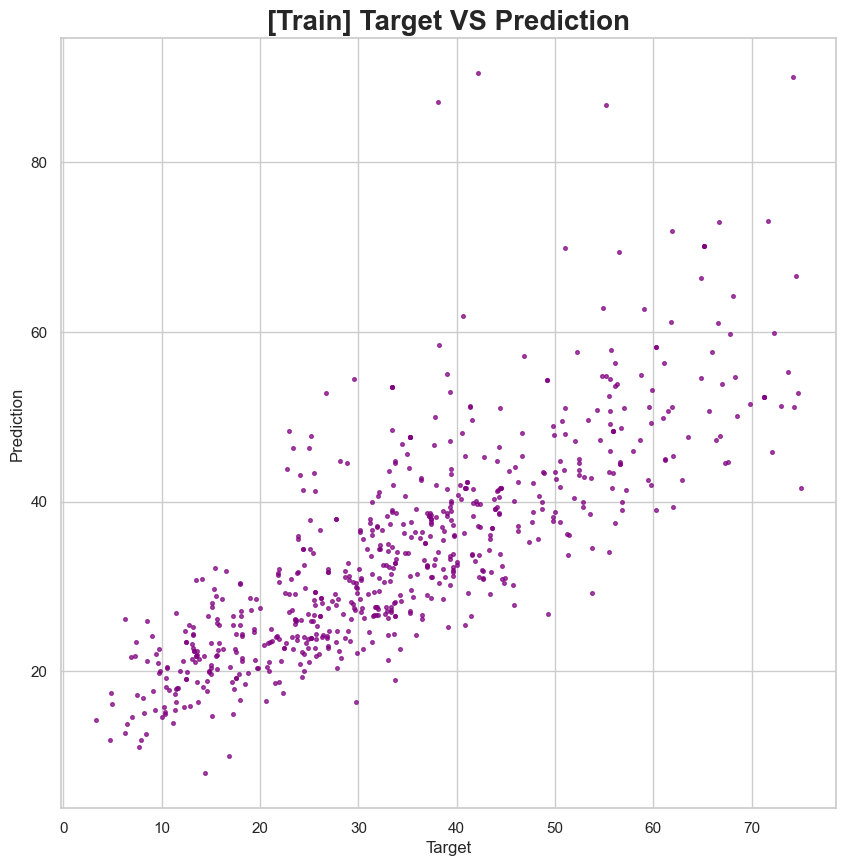

In [32]:
### 그래프 크기 지정
### 이번엔 matplotlib 으로 그려보겠다.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
### x = target, y = prediction으로 scatter plot그리기
### y가 가지고 있는 데이터 프레임에 추가하기
Train_visual_Adam = train_y_origin.copy()
Train_visual_Adam["Prediction"] = train_pred_Adam
Train_visual_Adam.columns= ["Target", "Prediction"]
x_Adam= Train_visual_Adam["Target"] ## train 데이터의 실제 y 값
y_Adam= Train_visual_Adam["Prediction"] ## train_pred의 예측값
axes = plt.scatter(x_Adam, y_Adam, color = 'purple', alpha = 0.7, s = 7)
plt.title("[Train] Target VS Prediction",fontsize=20,weight='bold')
plt.xlabel("Target") ## xlabel
plt.ylabel("Prediction") ## ylabel
plt.show()

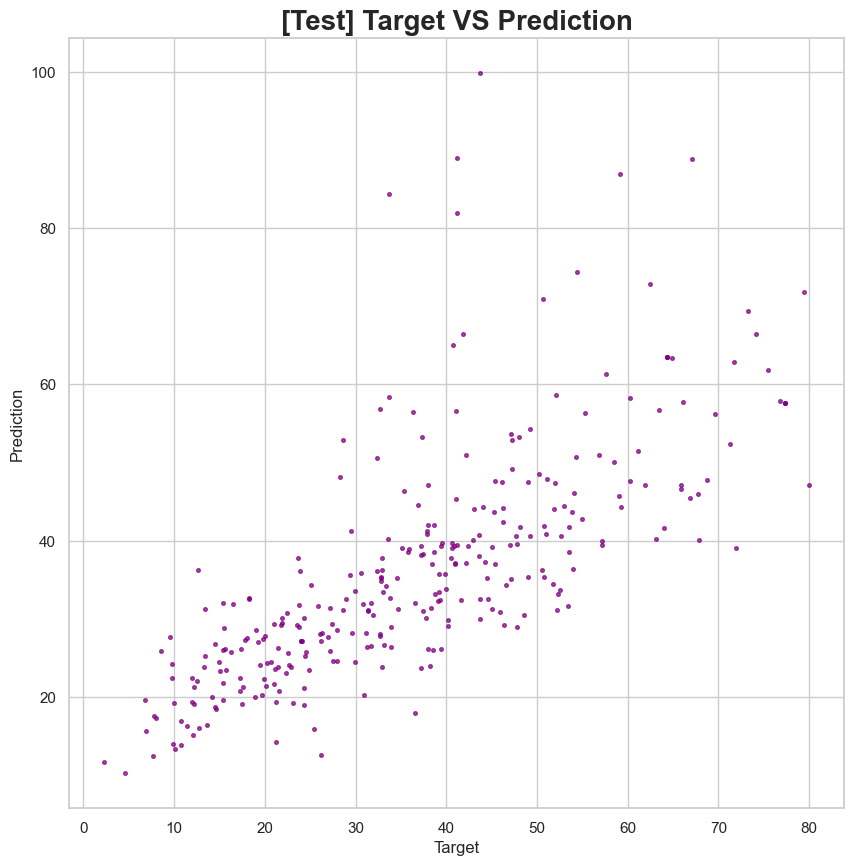

In [33]:
## test 예측값을 저장한다.
test_Y_re_Gradient = test_original.copy()
test_pred_Adam = gradient_model.predict(minmax_test)

### 그래프 크기 지정
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
### x = target, y = prediction으로 scatter plot그리기
### y가 가지고 있는 데이터 프레임에 추가하기
Test_visual_Adam = test_Y_re_Gradient
Test_visual_Adam["Prediction"] = test_pred_Adam
Test_visual_Adam.columns= ["Target", "Prediction"]
x_Adam= Test_visual_Adam["Target"] ## train 데이터의 실제 y 값
y_Adam= Test_visual_Adam["Prediction"] ## train_pred의 예측값
plt.scatter(x_Adam, y_Adam, color = 'purple', alpha = 0.7, s = 7)
plt.title("[Test] Target VS Prediction",fontsize=20,weight='bold')
plt.xlabel("Target") ## xlabel
plt.ylabel("Prediction") ## ylabel
plt.show()

#### 문제6. 학습 과정에서 회귀계수와 손실함수의 값들이 어떻게 변해왔는지 아래와 같이 시각화 해주세요.
<ol>
    <li>그래프의 크기는 (16, 6)입니다.
    <li>문제 5에서 정답이 없는 것처럼, 문제 6의 결과 또한 정답이 없습니다. 편하게 시각화 해주세요.
<ol/>

In [34]:
### 시각화 이전에 전처리
## theta용 데이터 프레임을 만들어주도록 하자. 
theta_visual = pd.DataFrame(np.arange(0, 20001),columns = ["Epochs"]) ## epoch 개수만큼의 행을 가진 틀을 제작한다.
theta_list = ["theta_1", "theta_2","theta_3","theta_4","theta_5", "bias"] ## theta 종류에 대한 list 를 제작한다.
for theta_name in theta_list: ## 반복문을 통해 list 를 채워나간다.
    theta_visual[theta_name] = theta_hist_Adam[theta_name]
    
## cost용 데이터 프레임을 만들어주자
cost_visual = pd.DataFrame(np.arange(0, 20001),columns = ["Epochs"]) ## epoch 개수만큼의 행을 가진 틀을 제작한다.
cost_visual["Cost"] = cost_hist_Adam

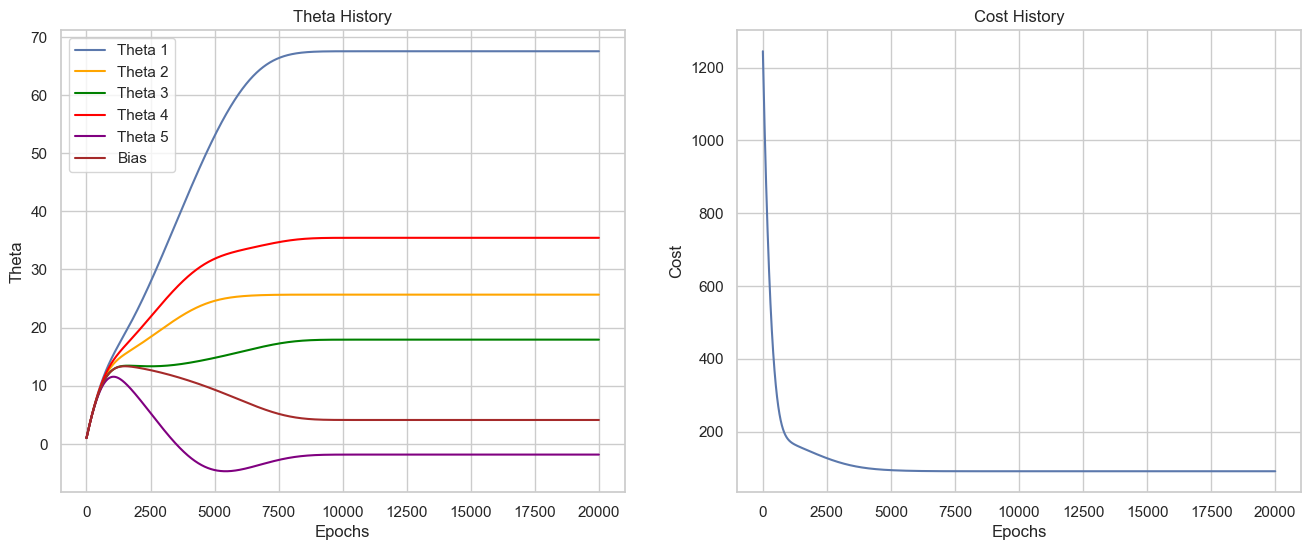

In [35]:
### 그래프 두개 그리기
f, axes = plt.subplots(1, 2, figsize = (16,6),sharex = True) ## 1, 2 짜리 기본 그래프 틀을 제작하고. figure size는 잘 안보여서 16, 6으로 키웠다
sns.set_style("whitegrid")

### 1번 그래프 그리기
y = theta_visual["Epochs"]
x1 = theta_visual["theta_1"]
x2 = theta_visual["theta_2"]
x3 = theta_visual["theta_3"]
x4 = theta_visual["theta_4"]
x5 = theta_visual["theta_5"]
bias = theta_visual["bias"]

### plt 사용
plt.subplot(121)
### theta 별로 그래프 그려서 겹치기
plt.plot(y, x1 , label = 'Theta 1', color = "#5B78AC") ## 코발트 블루 색상
plt.plot(y, x2, label = 'Theta 2', color = "orange")
plt.plot(y, x3, label = 'Theta 3', color = "green")
plt.plot(y, x4, label = 'Theta 4', color = "red")
plt.plot(y, x5, label = 'Theta 5', color = "purple")
plt.plot(y, bias, label = 'Bias', color = "brown")
plt.title("Theta History") ## 제목
plt.xlabel("Epochs") ## xlabel
plt.ylabel("Theta") ## ylabel
plt.legend() ## 범례 생성


### 2번 그래프 그리기

### plt 사용
plt.subplot(122) ## subplot 위치 결정 
plt.plot( cost_visual["Epochs"],cost_visual["Cost"], color = "#5B78AC", label = 'Bias') ## epoch, cost, color, label명
plt.title("Cost History") ## 제목
plt.xlabel("Epochs") ## xlabel
plt.ylabel("Cost") ## ylabel

plt.show()

### 그래프 크기 지정
### x = target, y = prediction으로 scatter plot그리기
### y가 가지고 있는 데이터 프레임에 추가하기


## Chapter 5: 모델링 결과 비교
#### 문제1. 모델별로 test 데이터에 대해 예측한 값들과 실제 값을 아래와 같이 비교해 주세요.


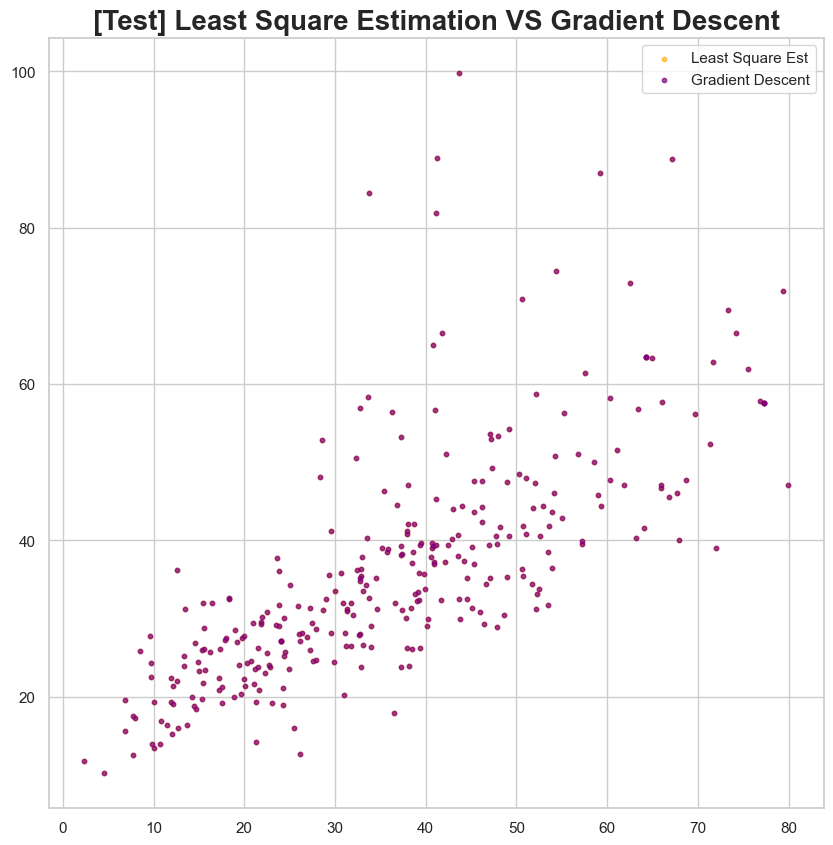

In [36]:
Test_visual_final = test_original.copy()
Test_visual_final["Prediction"] = test_pred
Test_visual_final.columns= ["Target", "Prediction"]
x = Test_visual_final["Target"]
y= Test_visual_final["Prediction"]

x_Adam = test_original.copy()
y_Adam = test_pred_Adam

plt.scatter(x, y, color = 'orange', alpha = 0.6, label = 'Least Square Est',s = 10) ## Least Square Est
plt.scatter(x_Adam, y_Adam, color = 'purple', alpha = 0.7, label = 'Gradient Descent' ,s = 10) ## Gradient Descent
plt.title("[Test] Least Square Estimation VS Gradient Descent",fontsize=20,weight='bold')
plt.legend()
plt.show() 
## 겹쳐서 그림이 하나로 보이네요,,, 어느 모델링에서 틀렸는지 찾아보도록 하겠습니다...

#### 문제2. 결과를 보면, 경사하강법을 활용한 회귀모형의 성능이 최소제곱법을 활용한 회귀모형의 성능보다 떨어지는 것을 알 수 있습니다. 이유가 무엇일까요?
경사하강법과 역전파를 사용한 모델이 상대적으로 최소 제곱법을 활용한 회귀 모델의 성능보다 떨어지는 이유는, 경사하강법과, 역전파에 있어서는 더욱 다양한 파라메터를 조정할 수 있으나, 현재는 이를 조정하지 못했기 때문이다. 만약 더욱 많은 조정을 통해서, 수행이 된다면, 더욱 좋은 결과를 나타낼 수도 있다. 또한 경사하강법은 feature의 개수가 많을 경우에 유리한 기법이나, 최소제곱법은 feature의 개수가 적을 경우에 유리한 기법이므로 상대적으로 뛰어남을 보일 수도 있다. 만약 더 많은 feature가 존재하게 된다면, 경사하강법이 더 뛰어난 성능을 보일 것이다. 0이 되는 값을 찾아야 global minimum을 찾을 수 있는데, 선형 회귀는 손실함수의 미분이 0이 되는 점을 찾기가 쉬우나, 경사하강법은 상대적으로 어렵다 그래서 오차가 발생할 수 밖에 없고 그 오차에 의해서 상대적으로 성능이 떨어질 수 밖에 없다.


#### 특징 정리 
<div style = "margin-top: 20px">
    <table style = "border: 1px solid; border-collapse: collapse; ">
        <th>S.NO.</th>
        <th>Gradient Descent</th>
        <th>Normal Equation</th>
        <tr>
            <td>1.</td>
            <td>In gradient descenet , we need to choose learning rate.</td>
            <td>In normal equation , no need to choose learning rate.</td>
        </tr>
        <tr>
            <td>2.</td>
            <td>	It is an iterative algorithm.</td>
            <td>It is analytical approach.</td>
        </tr>
        <tr>
            <td>3.</td>
            <td>Gradient descent works well with large number of features.</td>
            <td>Normal equation works well with small number of features.</td>
        </tr>
        <tr>
            <td>4.</td>
            <td>Feature scaling can be used.</td>
            <td>No need for feature scaling.</td>
        </tr>
        <tr>
            <td>5.</td>
            <td>No need to handle non-invertibility case.</td>
            <td>If (X.T*X) is non-invertible , regularization can be used to handle this.</td>
        </tr>
        <tr>
            <td>6.</td>
            <td>Algorithm complexity is O(kn^2).
n is the number of features.</td>
            <td>Algorithm complexity is O(n^3).
n is the number of features.</td>
        </tr>
    </table>
</div>
